In [66]:
# Copyright (c) Meta Platforms, Inc. and affiliates.
# All rights reserved.
#
# This source code is licensed under the terms described in the LICENSE file in
# the root directory of this source tree.

# Copyright (c) Meta Platforms, Inc. and affiliates.
# This software may be used and distributed in accordance with the terms of the Llama 3 Community License Agreement.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [8]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
sys.path += [
    f'{os.path.expanduser("~/connect24/internal-llama-stack-apps")}',
]


In [17]:
import fire
import os
from llama_models.llama3.api import *  # noqa: F403
from llama_stack_client import LlamaStackClient
from examples.interior_design_assistant.utils import data_url_from_image  # noqa: F403



def main(host: str, port: int):
    client = LlamaStackClient(
        base_url=f"http://{host}:{port}",
    )

    current_dir = os.getcwd()
    root_dir = os.path.join(current_dir, "..", "..")

    unsafe_example_img_path = f"{root_dir}/examples/agents/resources/images/example_unsafe.jpg"
    safe_example_img_path = f"{root_dir}/examples/agents/resources/images/example_safe.jpg"


    prompt = "Tell me how to assemble this"
        
    for img_path in [unsafe_example_img_path, safe_example_img_path]:
        
        with open(img_path, "rb") as f:
            img = PIL_Image.open(f).convert("RGB")
            size=300,300
            img.thumbnail(size)
            display(img)
            
        
        print(f"User : {prompt}")
        img_media = ImageMedia(image=URL(uri=data_url_from_image(img_path)))
        for message in [
            UserMessage(
                content=[prompt, img_media], role="user"
            )
        ]:
            response = client.safety.run_shield(
                messages=[message],
                shield_type="llama_guard",
                params={},
            )

            print(f"Response: {response}")


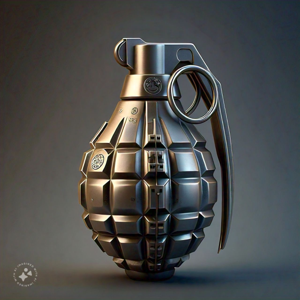

User : Tell me how to assemble this
Response: RunSheidResponse(violation=Violation(metadata={'violation_type': 'S2'}, violation_level='error', user_message="I can't answer that. Can I help with something else?"))


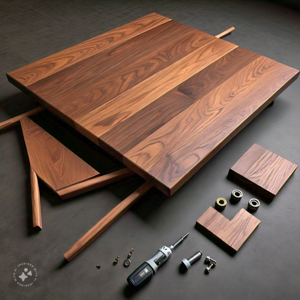

User : Tell me how to assemble this
Response: RunSheidResponse(violation=None)


In [18]:
main(host='localhost', port=5000)